In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten , BatchNormalization, InputLayer, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tqdm import tqdm
import tensorflow as tf

import cv2
import os

In [2]:
import seaborn as sns


In [3]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report



In [4]:
test_image = tf.keras.utils.load_img('../kaggle_competition/train_images/10001.png')

Image size: (64, 64)


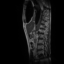

In [5]:
print(f"Image size: {test_image.size}")
test_image

In [6]:
train_data = pd.read_csv('../kaggle_competition/train_labels.csv')

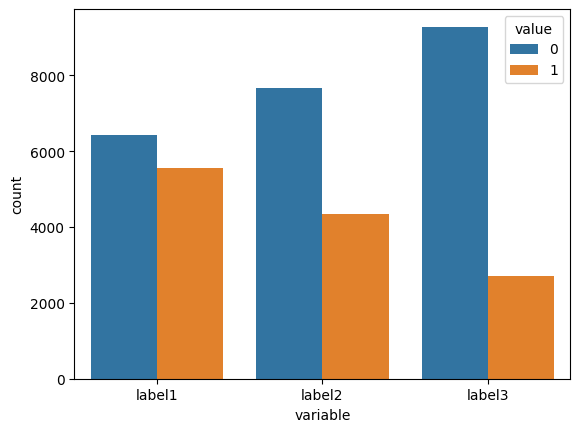

In [7]:
#data vizualization

df = train_data.drop(['id'],axis=1)
sns.countplot(x="variable", hue="value", data=pd.melt(df))

plt.show()

In [8]:
# Train data for data augumentation
augumented_train_data = pd.read_csv('../kaggle_competition/train_labels.csv')

### Drop rows where all labels are 1 or all labels are 0

In [9]:
# sum = 0
# for i in augumented_train_data.index:
#     if augumented_train_data['label1'][i]==0 and augumented_train_data["label2"][i]==0 and augumented_train_data["label3"][i]== 0:
#         sum +=1
# print(sum)

In [10]:
# for i in augumented_train_data.index:
#     if augumented_train_data['label1'][i]==0 and augumented_train_data["label2"][i]==0 and augumented_train_data["label3"][i]== 0:
#             augumented_train_data =   augumented_train_data.drop(i)

In [11]:
# for i in augumented_train_data.index:
#     if augumented_train_data['label1'][i]==1 and augumented_train_data["label2"][i]==1 and augumented_train_data["label3"][i]== 1:
#             augumented_train_data =   augumented_train_data.drop(i)

In [12]:
augumented_train_data.reset_index(drop=True, inplace=True)
augumented_train_data.shape

(12000, 4)

In [13]:
augumented_train_data.head(5)

,id,label1,label2,label3
0,10000.png,0,0,0
1,10001.png,0,0,1
2,10002.png,0,0,0
3,10003.png,0,0,0
4,10004.png,0,0,0


### Lista cu labelurile din new train data

In [14]:
label_list =[]
  
for rows in augumented_train_data.itertuples():
    my_list =[rows.label1, rows.label2, rows.label3]
    label_list.append(my_list)

print(label_list[:5])

[[0, 0, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [15]:
# creating two lists

augumented_train_image = []
augumented_label_list = []

for i, j in zip(tqdm(range(augumented_train_data.shape[0])), label_list):
        img = tf.keras.utils.load_img('../kaggle_competition/train_images/'+
                                 augumented_train_data['id'][i],
                                   target_size=(64,64))
        img = tf.keras.utils.img_to_array(img)


        
        
        #Horizontally flipped
        hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix

         #Vertically flipped
        vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix



        hflipped_image = hflipped_image/255
        vflipped_image = vflipped_image/255
        augumented_train_image.append(hflipped_image)
#         augumented_train_image.append(vflipped_image)

        augumented_label_list += ([j])
    
    


100%|██████████| 12000/12000 [00:02<00:00, 4405.28it/s]


In [16]:
# original_image = tf.keras.utils.load_img('../kaggle_competition/train_images/10001.png')
# horrizontal_image = tf.keras.utils.array_to_img(augumented_train_image[2])
# vertical_image = tf.keras.utils.array_to_img(augumented_train_image[3])

# fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(7,7))
# ax[0].imshow(original_image)
# ax[0].set_title("Original Image",fontweight="bold", size=10)
# ax[1].imshow(horrizontal_image)
# ax[1].set_title("Horizontal flipped",fontweight="bold", size=10)
# ax[2].imshow(vertical_image)
# ax[2].set_title("Vertically flipped",fontweight="bold", size=10);

Text(0.5, 1.0, 'Horizontal flipped')

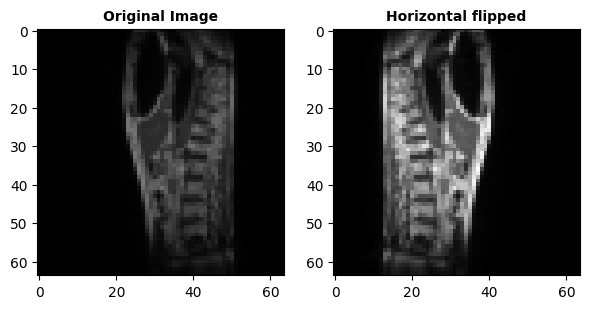

In [17]:
original_image = tf.keras.utils.load_img('../kaggle_competition/train_images/10001.png')
horrizontal_image = tf.keras.utils.array_to_img(augumented_train_image[1])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,7))
ax[0].imshow(original_image)
ax[0].set_title("Original Image",fontweight="bold", size=10)
ax[1].imshow(horrizontal_image)
ax[1].set_title("Horizontal flipped",fontweight="bold", size=10)


In [18]:
#imaginile din train setul original

train_image = []

for i in tqdm(range(train_data.shape[0])):
        img = tf.keras.utils.load_img('../kaggle_competition/train_images/'+
                                 train_data['id'][i],
                                   target_size=(64,64))
        img = tf.keras.utils.img_to_array(img)


        img = img/255.0
        train_image.append(img)
    
    


100%|██████████| 12000/12000 [00:01<00:00, 6025.17it/s]


### Create X_train and y_train by concatenating original train set with the augumented train set

In [19]:
augumented_X_train = np.array(augumented_train_image)
original_X_train = np.array(train_image)
X_train = np.concatenate((original_X_train, augumented_X_train))

X_train.shape

(24000, 64, 64, 3)

In [20]:
train_data.drop(['id'],axis=1)

,label1,label2,label3
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
11995,0,0,0
11996,0,0,0
11997,0,0,0
11998,1,1,0


In [21]:
augumented_y_train = np.array(augumented_label_list)
original_y_train = np.array(train_data.drop(['id'],axis=1))
y_train = np.concatenate((original_y_train, augumented_y_train))

y_train.shape

(24000, 3)

### Load validation data

In [22]:
val_data = pd.read_csv('../kaggle_competition/val_labels.csv')
val_data.head()

,id,label1,label2,label3
0,40000.png,0,0,0
1,40001.png,0,0,0
2,40002.png,0,0,0
3,40003.png,1,1,0
4,40004.png,0,0,0


In [23]:
val_image = []
for i in tqdm(range(val_data.shape[0])):
    img = tf.keras.utils.load_img('../kaggle_competition/val_images/'+
                         val_data['id'][i],
                           target_size=(64,64))
    img = tf.keras.utils.img_to_array(img)


    img = img/255.0
    val_image.append(img)
    
X_val = np.array(val_image)


100%|██████████| 3000/3000 [00:00<00:00, 5885.34it/s]


In [24]:
X_val.shape

(3000, 64, 64, 3)

In [25]:
y_val = np.array(val_data.drop(['id'],axis=1))
y_val.shape

(3000, 3)

### Create CNN Model

In [26]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))

In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [28]:
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [29]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=4,restore_best_weights=True, verbose=1)

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [31]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[get_f1, "accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), shuffle=True, batch_size = 64, callbacks=[es])

Epoch 1/20
375/375 [==============================] - 22s 56ms/step - loss: 0.4574 - get_f1: 0.7143 - accuracy: 0.6771 - val_loss: 0.3451 - val_get_f1: 0.8120 - val_accuracy: 0.9660
Epoch 2/20
375/375 [==============================] - 21s 56ms/step - loss: 0.3365 - get_f1: 0.8079 - accuracy: 0.8370 - val_loss: 0.3227 - val_get_f1: 0.8383 - val_accuracy: 0.9660
Epoch 3/20
375/375 [==============================] - 21s 56ms/step - loss: 0.3086 - get_f1: 0.8336 - accuracy: 0.8560 - val_loss: 0.2858 - val_get_f1: 0.8593 - val_accuracy: 0.9660
Epoch 4/20
375/375 [==============================] - 21s 55ms/step - loss: 0.2921 - get_f1: 0.8458 - accuracy: 0.8878 - val_loss: 0.2740 - val_get_f1: 0.8598 - val_accuracy: 0.9660
Epoch 5/20
375/375 [==============================] - 21s 55ms/step - loss: 0.2814 - get_f1: 0.8537 - accuracy: 0.8783 - val_loss: 0.2741 - val_get_f1: 0.8577 - val_accuracy: 0.9660
Epoch 6/20
375/375 [==============================] - 21s 55ms/step - loss: 0.2710 - get_f

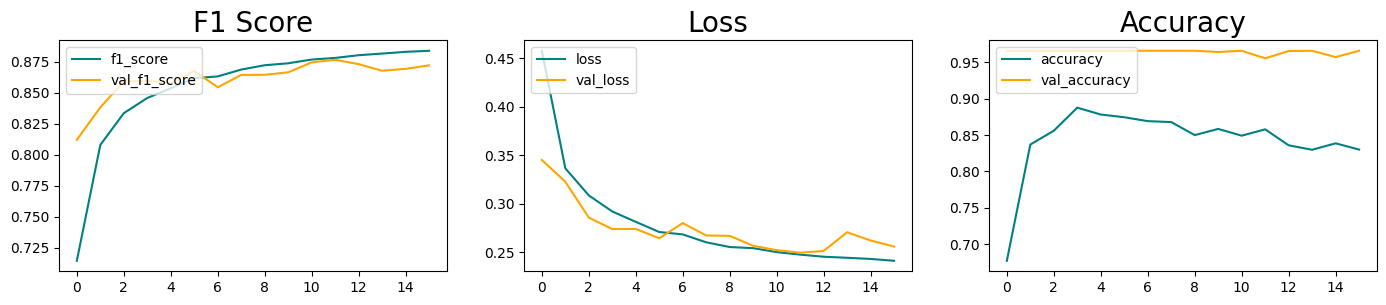

In [33]:
fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(17,3))
ax[0].plot(history.history['get_f1'], color='teal', label='f1_score')
ax[0].plot(history.history['val_get_f1'], color='orange', label='val_f1_score')
ax[0].set_title('F1 Score', fontsize=20)
ax[0].legend(loc="upper left")
ax[1].plot(history.history['loss'], color='teal', label='loss')
ax[1].plot(history.history['val_loss'], color='orange', label='val_loss')
ax[1].set_title('Loss', fontsize=20)
ax[1].legend(loc="upper left")
ax[2].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[2].plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
ax[2].set_title('Accuracy', fontsize=20)
ax[2].legend(loc="upper left")

In [34]:
predictions = model.predict(X_val[:15]) 
a =  np.matrix.round(predictions).astype(int)
b =  y_val[:15]

res = "\n".join("{} {}".format(x, y) for x, y in zip(a, b))
print("Pred:  Actual:  ")
print(res)


1/1 [==============================] - 0s 76ms/step
Pred:  Actual:  
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[1 1 0] [1 1 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[0 0 0] [0 0 0]
[1 1 1] [1 1 1]
[1 1 1] [1 1 1]
[1 1 0] [1 1 0]
[1 1 0] [1 0 0]


In [35]:

y_pred = model.predict(X_val)
y_pred_bool = np.matrix.round(y_pred).astype(int)

label_names = ['label 1', 'label 2', 'label 3']

print(classification_report(y_val, y_pred_bool,target_names=label_names))

94/94 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

     label 1       0.90      0.94      0.92      1447
     label 2       0.84      0.88      0.86      1153
     label 3       0.82      0.82      0.82       684

   micro avg       0.86      0.89      0.88      3284
   macro avg       0.85      0.88      0.87      3284
weighted avg       0.86      0.89      0.88      3284
 samples avg       0.42      0.45      0.43      3284



C:\Users\PesikaMau\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PesikaMau\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
test_data_kgl = pd.read_csv('../kaggle_competition/sample_submission.csv')
# data = data.head(100)
test_data_kgl.head()

,id,label1,label2,label3
0,70000.png,0,0,0
1,70001.png,0,0,0
2,70002.png,0,0,0
3,70003.png,0,0,0
4,70004.png,0,0,0


In [37]:
test_image_kgl = []
for i in tqdm(range(test_data_kgl.shape[0])):
    img = tf.keras.utils.load_img('../kaggle_competition/test_images/'+
                         test_data_kgl['id'][i],
                           target_size=(64,64))
    img = tf.keras.utils.img_to_array(img)
    img = img/255.0
    test_image_kgl.append(img)
    
X_test = np.array(test_image_kgl)

100%|██████████| 5000/5000 [00:00<00:00, 5858.17it/s]


In [38]:
predictions = model.predict(X_test)
predictions = np.matrix.round(predictions).astype(int)

157/157 [==============================] - 1s 7ms/step


In [39]:
predictions = pd.DataFrame(predictions,columns=["label1", 'label2', 'label3'])

In [40]:
sub = pd.concat([test_data_kgl.id,predictions],axis=1)
sub.set_index('id',inplace=True)

In [41]:
print("Predictions: \n", predictions[:7])

Predictions: 
       label1  label2  label3
0          1       1       1
1          1       1       0
2          0       0       0
3          0       0       0
4          1       1       0
...      ...     ...     ...
4995       0       0       0
4996       0       0       0
4997       0       0       0
4998       0       0       0
4999       0       0       0

[5000 rows x 3 columns]


In [42]:
sub.to_csv(f"Submission_file_proiect_copie.csv")

# Dense Neural Network

In [43]:
# creating two lists


augumented_train_image = []
augumented_label_list = []

for i, j in zip(tqdm(range(augumented_train_data.shape[0])), label_list):
        img = tf.keras.utils.load_img('../kaggle_competition/train_images/'+
                                 augumented_train_data['id'][i],
                                   target_size=(64,64))
        img = tf.keras.utils.img_to_array(img)

        mirror_img = tf.image.flip_left_right(img)
        updown_img = tf.image.flip_up_down(img)

        
        
        #Horizontally flipped
        hflipped_image= np.fliplr(img) 

         #Vertically flipped
        vflipped_image= np.flipud(img) 



        hflipped_image = hflipped_image/255
        vflipped_image = vflipped_image/255
        augumented_train_image.append(hflipped_image)
        augumented_train_image.append(vflipped_image)

        augumented_label_list += ([j]*2)
    
    


100%|██████████| 12000/12000 [00:08<00:00, 1375.58it/s]


In [44]:
augumented_X_train = np.array(augumented_train_image)
original_X_train = np.array(train_image)
X_train = np.concatenate((original_X_train, augumented_X_train))

X_train.shape

(36000, 64, 64, 3)

In [45]:
augumented_y_train = np.array(augumented_label_list)
original_y_train = np.array(train_data.drop(['id'],axis=1))
y_train = np.concatenate((original_y_train, augumented_y_train))

y_train.shape

(36000, 3)

In [46]:
model = Sequential()

model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))

In [47]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2457800   
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dropout_8 (Dropout)         (None, 200)              

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [49]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[get_f1, "accuracy"])

In [50]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), shuffle=True, batch_size = 80, callbacks=[es])

Epoch 1/50
450/450 [==============================] - 3s 6ms/step - loss: 0.6351 - get_f1: 0.6276 - accuracy: 0.6871 - val_loss: 0.5647 - val_get_f1: 0.7266 - val_accuracy: 0.9660
Epoch 2/50
450/450 [==============================] - 3s 6ms/step - loss: 0.5319 - get_f1: 0.7078 - accuracy: 0.9159 - val_loss: 0.4830 - val_get_f1: 0.7280 - val_accuracy: 0.9660
Epoch 3/50
450/450 [==============================] - 3s 6ms/step - loss: 0.4660 - get_f1: 0.7138 - accuracy: 0.9249 - val_loss: 0.4381 - val_get_f1: 0.7188 - val_accuracy: 0.9660
Epoch 4/50
450/450 [==============================] - 3s 6ms/step - loss: 0.4281 - get_f1: 0.7181 - accuracy: 0.9151 - val_loss: 0.4144 - val_get_f1: 0.7262 - val_accuracy: 0.9660
Epoch 5/50
450/450 [==============================] - 3s 6ms/step - loss: 0.4074 - get_f1: 0.7228 - accuracy: 0.9127 - val_loss: 0.3989 - val_get_f1: 0.7347 - val_accuracy: 0.9660
Epoch 6/50
450/450 [==============================] - 3s 6ms/step - loss: 0.3919 - get_f1: 0.7308 - 

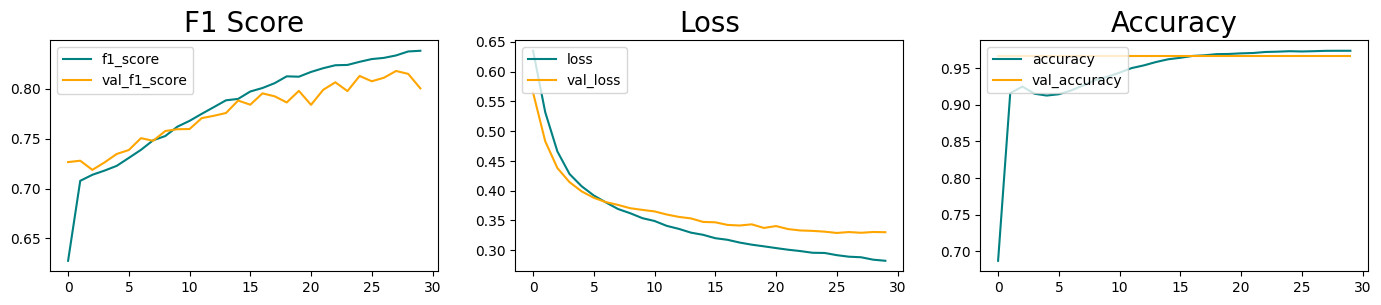

In [51]:
fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(17,3))
ax[0].plot(history.history['get_f1'], color='teal', label='f1_score')
ax[0].plot(history.history['val_get_f1'], color='orange', label='val_f1_score')
ax[0].set_title('F1 Score', fontsize=20)
ax[0].legend(loc="upper left")
ax[1].plot(history.history['loss'], color='teal', label='loss')
ax[1].plot(history.history['val_loss'], color='orange', label='val_loss')
ax[1].set_title('Loss', fontsize=20)
ax[1].legend(loc="upper left")
ax[2].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[2].plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
ax[2].set_title('Accuracy', fontsize=20)
ax[2].legend(loc="upper left")

In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred_bool = np.matrix.round(y_pred).astype(int)

label_names = ['label 1', 'label 2', 'label 3']

print(classification_report(y_val, y_pred_bool,target_names=label_names))

94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     label 1       0.88      0.86      0.87      1447
     label 2       0.80      0.84      0.82      1153
     label 3       0.70      0.60      0.65       684

   micro avg       0.82      0.80      0.81      3284
   macro avg       0.79      0.77      0.78      3284
weighted avg       0.81      0.80      0.81      3284
 samples avg       0.38      0.39      0.37      3284



C:\Users\PesikaMau\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PesikaMau\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
predictions = model.predict(X_test)
predictions = np.matrix.round(predictions).astype(int)
predictions = pd.DataFrame(predictions,columns=["label1", 'label2', 'label3'])

157/157 [==============================] - 0s 2ms/step


In [54]:
sub = pd.concat([test_data_kgl.id,predictions],axis=1)
sub.set_index('id',inplace=True)

In [55]:
sub.to_csv(f"Submission_dense_nn.csv")